In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import numpy as np
import scipy.io as sio
from numpy import expand_dims
from numpy import asarray
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from skimage.filters import gabor_kernel
from scipy import ndimage as nd        
import matplotlib
import matplotlib.pyplot as plt    
from numpy.linalg import norm
from keras.optimizers import SGD, Adam, Adagrad
import graphviz
import pydot

In [2]:

split_path = 'E:/Sushree/Dataset/data/xlsa17/data/AWA2/att_splits.mat'
print(split_path)
matcontent = sio.loadmat(split_path)
    
att = matcontent['att'].T
print(att, att.shape)  

E:/Sushree/Dataset/data/xlsa17/data/AWA2/att_splits.mat
[[-0.00375358 -0.00375358 -0.00375358 ...  0.00882092  0.03640974
   0.03145501]
 [ 0.12045618  0.00426584  0.         ...  0.17996306  0.0618086
   0.03495531]
 [ 0.26584459  0.20652363  0.         ...  0.05026822  0.04274552
   0.04915256]
 ...
 [ 0.22516498  0.15266022  0.         ...  0.12733492  0.10009694
   0.01771   ]
 [ 0.19613947  0.1966714   0.         ...  0.01787277  0.06698743
   0.25883601]
 [ 0.03819588  0.08046548  0.10363715 ...  0.01479997  0.05250999
   0.14194515]] (50, 85)


In [3]:
att[att<0] = 0

In [7]:

split_path = 'E:/Sushree/Dataset/data/xlsa17/data/AWA2/binaryAtt_splits.mat'
print(split_path)
matcontent = sio.loadmat(split_path)
    
att = matcontent['att'].T
print(att, att.shape) 

E:/Sushree/Dataset/data/xlsa17/data/AWA2/binaryAtt_splits.mat
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 1 1 0]
 [1 1 0 ... 0 0 1]
 [0 1 1 ... 0 0 1]] (50, 85)


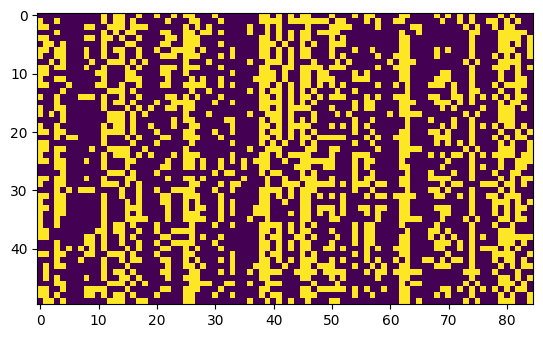

In [9]:
plt.imshow(att)

In [11]:
import pickle

attribute_path = 'E:/Sushree/Dataset/Animals_with_Attributes2/w2v/AWA2_attribute.pkl'

with open(attribute_path,'rb') as f:
    w2v_att = pickle.load(f)

print(w2v_att, w2v_att.shape)

[[ 0.10498047  0.01843262  0.00897217 ...  0.09228516  0.06103516
  -0.1328125 ]
 [ 0.02697754  0.06933594  0.02416992 ...  0.06933594  0.06982422
  -0.03369141]
 [ 0.0390625   0.08642578  0.22363281 ...  0.04663086  0.02258301
  -0.15722656]
 ...
 [ 0.21289062  0.15039062 -0.14746094 ... -0.18652344 -0.10351562
   0.24609375]
 [-0.04574585  0.37304688 -0.51708984 ... -0.26953125  0.06518555
   0.38085938]
 [-0.29492188  0.15039062 -0.1484375  ...  0.11572266  0.07519531
   0.00210571]] (85, 300)
